In [1]:
#%%writefile homeworkTitle.py

In [2]:
%matplotlib inline

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

In [5]:
# Read the City Data
city_df = pd.read_csv("data/city_data.csv")
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# Read the Ride Data
ride_df = pd.read_csv("data/ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [7]:
# Combine the data into a single dataset
# Display the data table for preview
merged_df = pd.merge(city_df, ride_df, on="city", how="outer")
merged_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [8]:
#re-arange
rearange_df = merged_df [["city", "date", "fare", "ride_id", "driver_count", "type"]] 
rearange_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [9]:
#**** Bubble Plot of Ride Sharing Data

In [10]:
#Total number of rides per city  
total_rides = rearange_df.groupby ("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns={"ride_id":"total_rides"})
total_rides.head()

,city,total_rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [11]:
#Average fare per city
average_fare = rearange_df.groupby ("city")["fare"].mean().round(2)
average_fare = pd.DataFrame(average_fare).reset_index()
average_fare = average_fare.rename(columns={"fare":"average_fare"})
average_fare.head()

,city,average_fare
0,Amandaburgh,24.64
1,Barajasview,25.33
2,Barronchester,36.42
3,Bethanyland,32.96
4,Bradshawfurt,40.06


In [12]:
#circle size correlates with driver count per city
driver_count = rearange_df[["city", "driver_count"]].drop_duplicates("city")
driver_count.head()

,city,driver_count
0,Richardfort,38
28,Williamsstad,59
51,Port Angela,67
70,Rodneyfort,34
93,West Robert,39


In [13]:
# catagorize cities in 3 city types: Urban, Suburban, Rural
city_type = rearange_df[["city", "type"]].drop_duplicates("city")
city_type.head()

,city,type
0,Richardfort,Urban
28,Williamsstad,Urban
51,Port Angela,Urban
70,Rodneyfort,Urban
93,West Robert,Urban


In [14]:
#Combine and generate df for Ride Sharing Data with #of rides per city, average fare, driver counts per city and citytype.
combined_df = pd.merge(pd.merge(pd.merge(total_rides, average_fare, on="city"), driver_count, on="city"), city_type, on="city")
combined_df.head()

,city,total_rides,average_fare,driver_count,type
0,Amandaburgh,18,24.64,12,Urban
1,Barajasview,22,25.33,26,Urban
2,Barronchester,16,36.42,11,Suburban
3,Bethanyland,18,32.96,22,Suburban
4,Bradshawfurt,10,40.06,7,Rural


In [15]:
# selecting city type from combined_df for bubble plots
type_urban = combined_df.loc[combined_df['type'] == 'Urban']
type_suburban = combined_df.loc[combined_df['type'] == 'Suburban']
type_rural = combined_df.loc[combined_df['type'] == 'Rural']

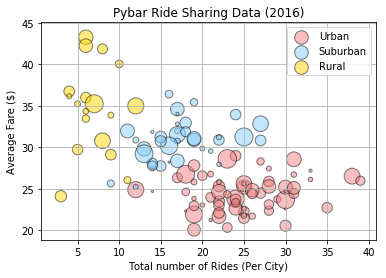

In [16]:
#Bubble Plot axises: Gold, Light Sky Blue, and Light Coral
v1 = type_urban.plot(kind='scatter',x='total_rides', y='average_fare',
                       color='lightcoral', s=combined_df['driver_count']*5, label = 'Urban', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1)    
v2 = type_suburban.plot(kind='scatter', x='total_rides', y='average_fare', 
                          color='lightskyblue',s=combined_df['driver_count']*5, label = 'Suburban', 
                          alpha = 0.5, edgecolor = "black", linewidths = 1, ax=v1)    
v3 = type_rural.plot(kind='scatter', x='total_rides', y='average_fare', 
                       color='gold', s=combined_df['driver_count']*5, label = 'Rural', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=v1)

plt.grid()
plt.title("Pybar Ride Sharing Data (2016)")
plt.xlabel("Total number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.savefig("Pybar Ride Sharing Data.png")
plt.show()
#plt.text("Note: Circle size correlates with driver count per city", (combined_df.iloc[:,1]))


In [17]:
# Total Fares by City Type

In [18]:
# Percent of Total Fares by City Type
total_fares = combined_df["average_fare"].sum()
urban_fare = combined_df.loc[combined_df["type"] == "Urban", "average_fare"].sum()
rural_fare = combined_df.loc[combined_df["type"] == "Rural", "average_fare"].sum()
suburban_fare = combined_df.loc[combined_df["type"] == "Suburban", "average_fare"].sum()
percent_urban_fare = (urban_fare/total_fares) * 100
percent_rural_fare = (rural_fare/total_fares) * 100
percent_suburban_fare = (suburban_fare/total_fares) *100

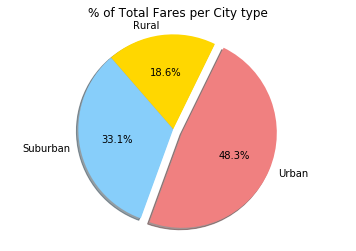

In [19]:
# plot Pie chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [percent_urban_fare, percent_rural_fare, percent_suburban_fare]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)  

#create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=250)

plt.axis("equal")
plt.title("% of Total Fares per City type")
plt.savefig("Total Fare per City.png")
plt.show()

In [20]:
# Total Rides by City Type

In [21]:
# Percent of Total rides by City Type
total_rides = combined_df["total_rides"].sum()
urban_rides = combined_df.loc[combined_df["type"] == "Urban", "total_rides"].sum()
rural_rides = combined_df.loc[combined_df["type"] == "Rural", "total_rides"].sum()
suburban_rides = combined_df.loc[combined_df["type"] == "Suburban", "total_rides"].sum()
percent_urban_rides = (urban_rides/total_rides) * 100
percent_rural_rides = (rural_rides/total_rides) * 100
percent_suburban_rides = (suburban_rides/total_rides) *100

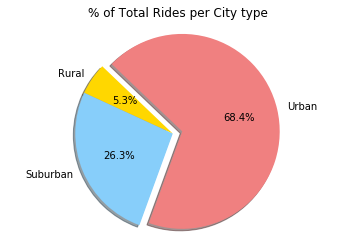

In [22]:
# plot Pie chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [percent_urban_rides, percent_rural_rides, percent_suburban_rides]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)  

#create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=250)

plt.axis("equal")
plt.title("% of Total Rides per City type")
plt.savefig("Total Rides per City.png")
plt.show()

In [23]:
# Total Drivers by City Type

In [24]:
# Percent of Total rides by City Type
total_drivers = combined_df["driver_count"].sum()
urban_drivers = combined_df.loc[combined_df["type"] == "Urban", "driver_count"].sum()
rural_drivers = combined_df.loc[combined_df["type"] == "Rural", "driver_count"].sum()
suburban_drivers = combined_df.loc[combined_df["type"] == "Suburban", "driver_count"].sum()
percent_urban_drivers = (urban_drivers/total_drivers) * 100
percent_rural_drivers = (rural_drivers/total_drivers) * 100
percent_suburban_drivers = (suburban_drivers/total_drivers) *100

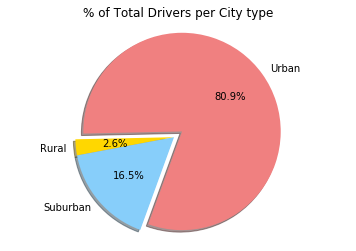

In [25]:
# plot Pie chart
labels = ["Urban", "Rural", "Suburban"]
sizes = [percent_urban_drivers, percent_rural_drivers, percent_suburban_drivers]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)  

#create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=250)

plt.axis("equal")
plt.title("% of Total Drivers per City type")
plt.savefig("Total Drivers per City.png")
plt.show()

In [26]:
# Conclusions:
    
#     - Urban area has most of the riders (~68%), drivers (~81%), highest amount of total fare (~48%)
#     - According to the bubble plot, average fare is least in Urban area and highest in rural area
#     - For all the parameters this data set follows a trend and highest to lowest order of rider counts, driver counts and total fare amount is: Urban> Suburban> Rural
    